In [876]:
import math
import random
import time

import sklearn.metrics
from numpy import arange, c_
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

from scipy import optimize

import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve

import matplotlib.pyplot as plt

import pandas as pd



noise = 16
samples = 2425
seed = 244825
classes = 2
train_split = 0.8
test_split = 0.2
repeats = 100

In [877]:
def my_normalize(matrix):
    return (matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))

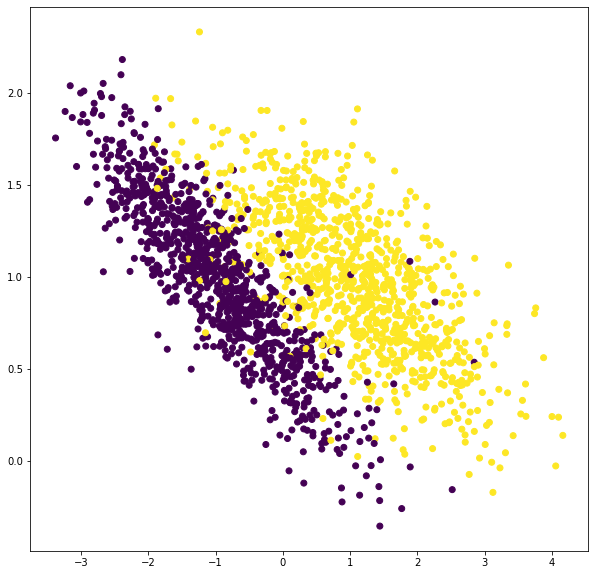

In [878]:
X, y = datasets.make_classification(n_features=2, random_state=seed, n_redundant=0, n_samples=samples, n_classes=2, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_split, test_size=test_split, random_state=seed)

xx, yy = np.meshgrid(np.arange(-3.25, 4.25, 0.01),
                       np.arange(-0.25, 2.25, 0.01))

# X_train = my_normalize(X_train)
# X_test = my_normalize(X_test)


plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [879]:
model = LogisticRegression()

time_sk = time.perf_counter()
model.fit(X_train, y_train.flatten())
time_sk = time.perf_counter() - time_sk
predict = model.predict(X_test)

confusion_matrix(y_test, predict)

array([[228,   7],
       [ 18, 232]], dtype=int64)

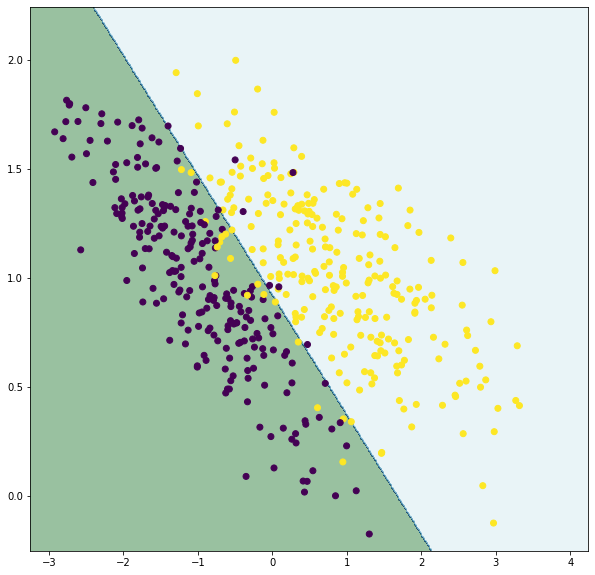

In [880]:
predict = model.predict(c_[xx.ravel(), yy.ravel()])
predict = predict.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, predict, alpha=0.4, cmap='ocean')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

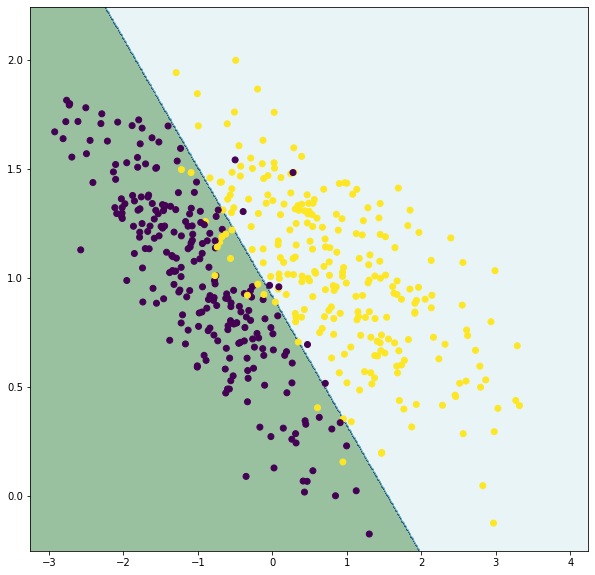

In [881]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


y_train = y_train.reshape(len(y_train), 1)

X_new = np.c_[np.ones([len(X_train), 1]), X_train]

theta = np.ones([X_new.shape[1], 1])


step = 0.01

time_my = time.perf_counter()

for i in range(100):
    s = X_new @ theta
    X_t_delta = sigmoid(s)
    delta_theta = (-step * ((X_t_delta - y_train) * (1 - X_t_delta) * X_t_delta).T @ X_new).T
    theta += delta_theta

time_my = time.perf_counter() - time_my

zzz = np.c_[xx.flatten(), yy.flatten()]
zzz = np.c_[np.ones([len(xx.flatten()), 1]), zzz]

predict1 = sigmoid(zzz @ theta)
predict1 = [1 if x >= 0.5 else 0 for x in predict1]
predict1 = np.asarray(predict1).reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, predict1, alpha=0.4, cmap='ocean')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

In [882]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))


X_new_test = np.c_[np.ones([len(X_test), 1]), X_test]
prediction = sigmoid(X_new_test @ theta)
prediction = [1 if x >= 0.5 else 0 for x in prediction]

print(theta)
print(model.intercept_, model.coef_)

[[-4.50164682]
 [ 2.89757531]
 [ 4.90619047]]
[-6.51194831] [[3.8728314  7.05444247]]


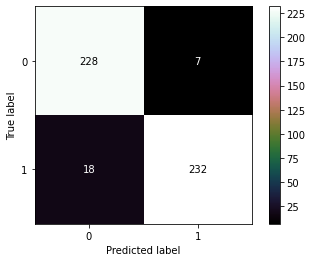

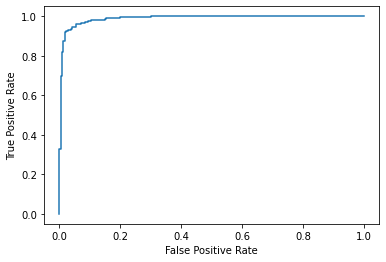

In [883]:
cm_model = confusion_matrix(y_test, model.predict(X_test))
tn_model = cm_model[0][0]
fn_model = cm_model[0][1]
tp_model = cm_model[1][1]
fp_model = cm_model[1][0]
ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

fpr, tpr, roc_auc = roc_curve(y_test, model.decision_function(X_test))

rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
rok_model.plot()

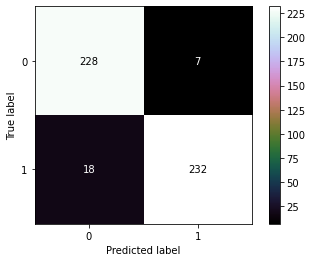

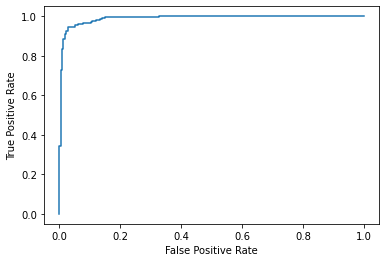

In [884]:
cm_model = confusion_matrix(y_test, prediction)
tn_my = cm_model[0][0]
fn_my = cm_model[0][1]
tp_my = cm_model[1][1]
fp_my = cm_model[1][0]
ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

X_new_test = np.c_[np.ones([len(X_test), 1]), X_test]

fpr, tpr, roc_auc = roc_curve(y_test, sigmoid(X_new_test @ theta))

rok_analitic = RocCurveDisplay(fpr=fpr, tpr=tpr)
rok_analitic.plot()

In [885]:
print("Czas wykonania moj:", time_my)
print("Czas wykonania sklearn:", time_sk)

print("Czulosc moj:", tp_my/(tp_my + fn_my))
print("Czulosc sklearn:", tp_model/(tp_model + fn_model))

print("Swoistosc moj:", tn_my/(tn_my + fp_my))
print("Swoistosc sklearn:", tn_model/(tn_model + fp_model))

print("Accuracy moj", (tp_my + tn_my) / (tp_my + tn_my + fp_my + fn_my))
print("Accuracy sklearn", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

Czas wykonania moj: 0.00439000001642853
Czas wykonania sklearn: 0.004686600004788488
Czulosc moj: 0.9707112970711297
Czulosc sklearn: 0.9707112970711297
Swoistosc moj: 0.926829268292683
Swoistosc sklearn: 0.926829268292683
Accuracy moj 0.9484536082474226
Accuracy sklearn 0.9484536082474226


# Cz. 2

In [886]:
australia = pd.read_csv('weatherAUS.csv')
print(len(australia.columns))
threshhold = math.floor(len(australia) * 0.7)

australia.loc[australia['RainToday'] == 'Yes', 'RainToday'] = 1.0
australia.loc[australia['RainToday'] == 'No', 'RainToday'] = 0.0

australia.loc[australia['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1.0
australia.loc[australia['RainTomorrow'] == 'No', 'RainTomorrow'] = 0.0

australia

23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0


In [887]:
australia.dropna(axis=1, thresh=threshhold, inplace=True)
australia.dropna(axis=0, subset='RainTomorrow', inplace=True)
# australia['RainToday'].apply()

# australia = australia[australia['RainToday'] != 'SE']
print(len(australia.columns))
australia['RainToday'].value_counts()

19


0.0    109332
1.0     31455
Name: RainToday, dtype: int64

In [888]:
y_australia = australia['RainTomorrow']
australia.drop(columns='RainTomorrow')

australia.fillna(
    {
        'Location': australia['Location'].mode().values[0],
        'MinTemp': australia['MinTemp'].median(),
        'MaxTemp': australia['MaxTemp'].median(),
        'Rainfall': australia['Rainfall'].median(),
        'WindGustDir': australia['WindGustDir'].mode().values[0],
        'WindGustSpeed': australia['WindGustSpeed'].median(),
        'WindDir9am': australia['WindDir9am'].mode().values[0],
        'WindDir3pm': australia['WindDir3pm'].mode().values[0],
        'WindSpeed9am': australia['WindSpeed9am'].median(),
        'WindSpeed3pm': australia['WindSpeed3pm'].median(),
        'Humidity3pm': australia['Humidity3pm'].median(),
        'Humidity9am': australia['Humidity9am'].median(),
        'Pressure3pm': australia['Pressure3pm'].median(),
        'Pressure9am': australia['Pressure9am'].median(),
        'Temp3pm': australia['Temp3pm'].median(),
        'Temp9am': australia['Temp9am'].median(),
        'RainToday': australia['RainToday'].mode().values[0],

    },
    inplace=True
)

In [889]:
from scipy.stats.mstats import winsorize

def clip_series(s, lower, upper):
   clipped = s.clip(lower=s.quantile(lower), upper=s.quantile(upper), axis=0)
   return clipped

print(australia.max())
columns_to_winsorize = ['MinTemp', 'MaxTemp',
                        'Rainfall',
                        'WindGustSpeed',
                        'WindSpeed9am',
                        'WindSpeed3pm',
                        'Humidity9am',
                        'Humidity3pm',
                        'Pressure3pm',
                        'Pressure9am',
                        'Temp9am',
                        'Temp3pm']
for y in columns_to_winsorize:
    australia[y] = clip_series(australia[y], 0.1, 0.9)

australia.max()

Date             2017-06-25
Location            Woomera
MinTemp                33.9
MaxTemp                48.1
Rainfall              371.0
WindGustDir             WSW
WindGustSpeed         135.0
WindDir9am              WSW
WindDir3pm              WSW
WindSpeed9am          130.0
WindSpeed3pm           87.0
Humidity9am           100.0
Humidity3pm           100.0
Pressure9am          1041.0
Pressure3pm          1039.6
Temp9am                40.2
Temp3pm                46.7
RainToday               1.0
RainTomorrow            1.0
dtype: object


Date             2017-06-25
Location            Woomera
MinTemp                20.8
MaxTemp                32.9
Rainfall                6.0
WindGustDir             WSW
WindGustSpeed          57.0
WindDir9am              WSW
WindDir3pm              WSW
WindSpeed9am           26.0
WindSpeed3pm           30.0
Humidity9am            94.0
Humidity3pm            79.0
Pressure9am          1026.3
Pressure3pm          1023.9
Temp9am                25.8
Temp3pm                31.1
RainToday               1.0
RainTomorrow            1.0
dtype: object

In [890]:
australia['Date'] = pd.to_datetime(australia['Date'])

australia['Year']= australia['Date'].dt.year
australia['Month']= australia['Date'].dt.month
australia['Day']= australia['Date'].dt.day
australia.dropna(subset='Date', inplace=True)
# australia.drop(columns=['Date', 'Year'], inplace=True)
australia.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [891]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='error')

encoder_df = pd.DataFrame(encoder.fit_transform(australia[['WindGustDir', 'WindDir3pm', 'WindDir9am', 'Day', 'Month']]))

encoder_df.columns = encoder.get_feature_names_out()

new_australia = australia.join(encoder_df)
new_australia.drop(columns=['WindGustDir', 'WindDir3pm', 'WindDir9am', 'Day', 'Month', 'Year', 'Rainfall', 'RainToday'], inplace=True)

print(len(new_australia))
print(new_australia.isna().sum())

############
############ 3190 wartosci pojawia sie NaN, czemu?
############
new_australia.dropna(inplace=True)

new_australia

142193
Date                0
Location            0
MinTemp             0
MaxTemp             0
WindGustSpeed       0
                 ... 
Month_8          3190
Month_9          3190
Month_10         3190
Month_11         3190
Month_12         3190
Length: 105, dtype: int64


,Date,Location,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2008-12-01,Albury,13.4,22.9,44.0,20.0,24.0,71.0,23.0,1009.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2008-12-02,Albury,7.4,25.1,44.0,4.0,22.0,44.0,25.0,1010.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2008-12-03,Albury,12.9,25.7,46.0,19.0,26.0,44.0,30.0,1009.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2008-12-04,Albury,9.2,28.0,24.0,11.0,9.0,45.0,23.0,1017.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2008-12-05,Albury,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1010.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-03-02,Darwin,20.8,32.9,28.0,11.0,9.0,76.0,49.0,1009.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
142189,2017-03-03,Darwin,20.8,32.9,57.0,7.0,9.0,70.0,64.0,1009.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
142190,2017-03-04,Darwin,20.8,32.0,56.0,9.0,9.0,75.0,62.0,1009.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
142191,2017-03-05,Darwin,20.8,28.4,57.0,26.0,24.0,94.0,79.0,1009.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [892]:
provinces = new_australia.groupby('Location')
dataframes = [group for _, group in provinces]
# dataframes[20]['Location'].unique()[0]
smallest = len(min(dataframes, key=lambda x: len(x)))
dataframes2 = list()
for frame in dataframes:
    dataframes2.append(frame.sample(n=smallest, random_state=seed))

Adelaide records: 3090
Czulosc: 0.7345132743362832
Swoistosc: 0.8594059405940594
Accuracy: 0.8365695792880259
ROC auc: 0.7371529332736229
F1 score: 0.6217228464419476


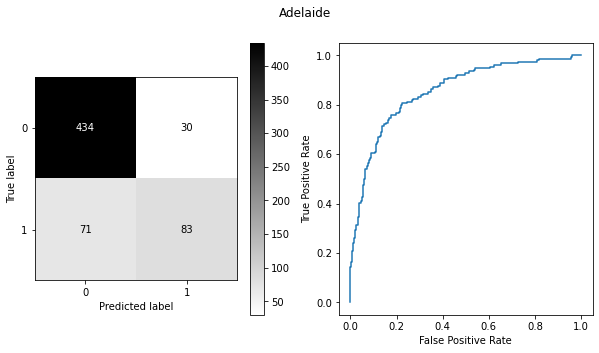

Albany records: 3016
Czulosc: 0.7022900763358778
Swoistosc: 0.7949260042283298
Accuracy: 0.7748344370860927
ROC auc: 0.6963982915790145
F1 score: 0.575


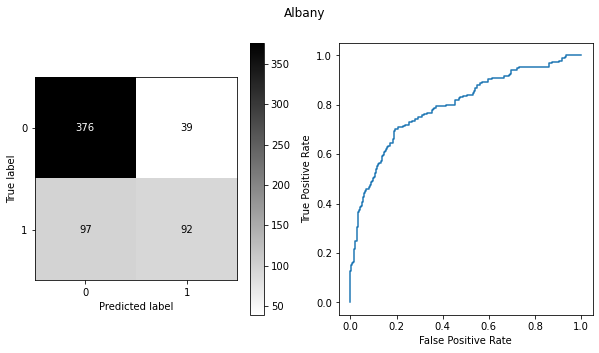

Albury records: 3011
Czulosc: 0.6883116883116883
Swoistosc: 0.8992395437262357
Accuracy: 0.8723051409618574
ROC auc: 0.7258551307847082
F1 score: 0.5792349726775957


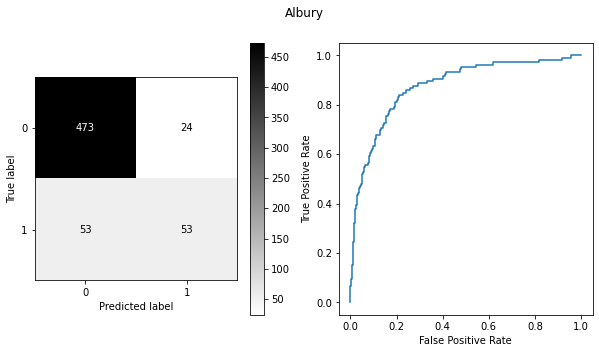

AliceSprings records: 3031
Czulosc: 0.6785714285714286
Swoistosc: 0.9430051813471503
Accuracy: 0.9308072487644151
ROC auc: 0.6745841995841996
F1 score: 0.475


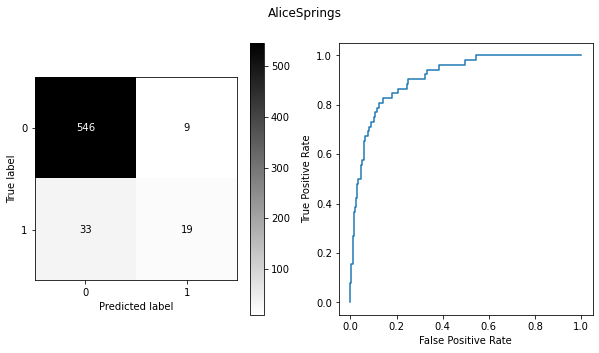

BadgerysCreek records: 2928
Czulosc: 0.6265060240963856
Swoistosc: 0.9005964214711729
Accuracy: 0.8617747440273038
ROC auc: 0.7228771673958839
F1 score: 0.5621621621621622


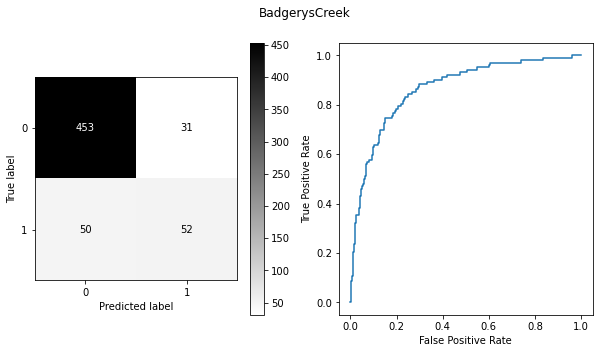

Ballarat records: 3028
Czulosc: 0.6311475409836066
Swoistosc: 0.859504132231405
Accuracy: 0.8135313531353136
ROC auc: 0.71671029994764
F1 score: 0.5767790262172283


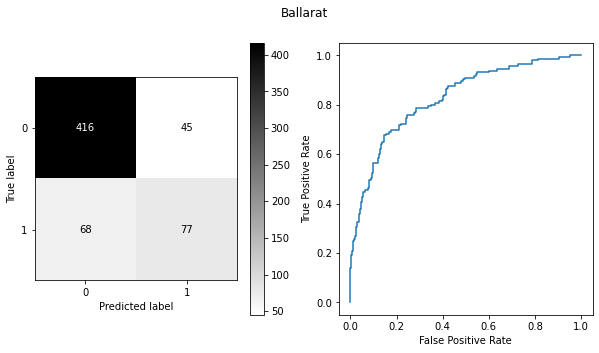

Bendigo records: 3034
Czulosc: 0.6986301369863014
Swoistosc: 0.9063670411985019
Accuracy: 0.8813838550247117
ROC auc: 0.7307361170899699
F1 score: 0.5862068965517241


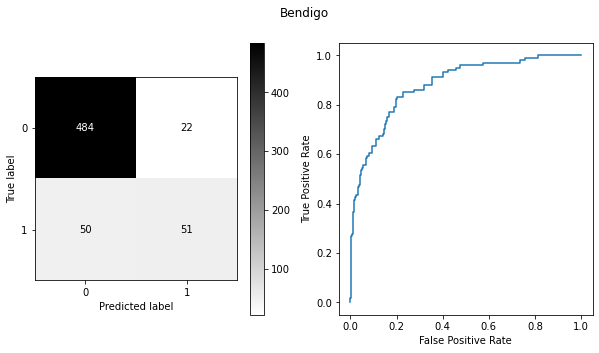

Brisbane records: 3161
Czulosc: 0.6808510638297872
Swoistosc: 0.8868274582560297
Accuracy: 0.8562401263823065
ROC auc: 0.7264724409448818
F1 score: 0.5844748858447488


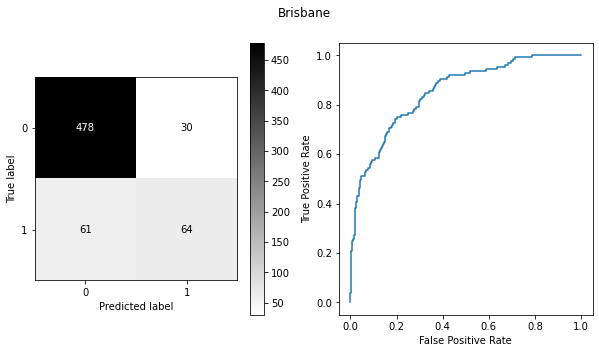

Cairns records: 2988
Czulosc: 0.6848484848484848
Swoistosc: 0.8175519630484989
Accuracy: 0.7809364548494984
ROC auc: 0.730231424466338
F1 score: 0.6330532212885154


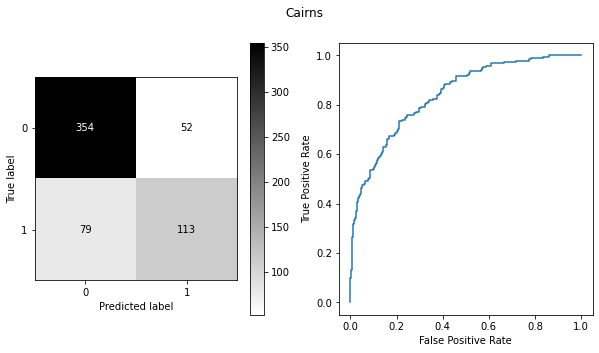

Canberra records: 3418
Czulosc: 0.6904761904761905
Swoistosc: 0.89
Accuracy: 0.8654970760233918
ROC auc: 0.7106566820276496
F1 score: 0.5576923076923077


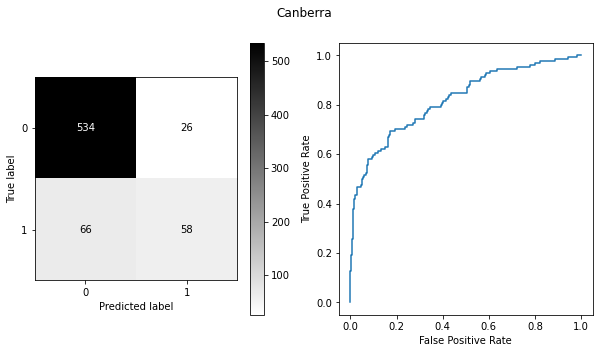

Cobar records: 2988
Czulosc: 0.7073170731707317
Swoistosc: 0.9156193895870736
Accuracy: 0.9013377926421404
ROC auc: 0.6792952208106473
F1 score: 0.4957264957264957


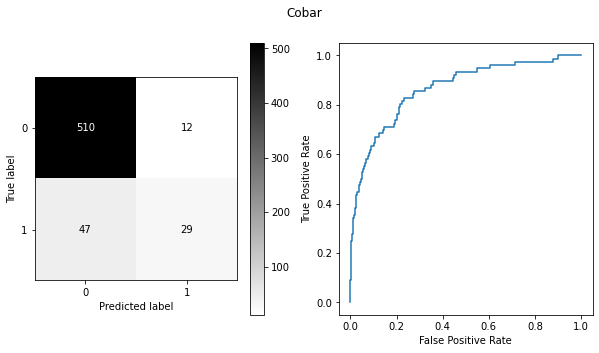

CoffsHarbour records: 2953
Czulosc: 0.7426470588235294
Swoistosc: 0.8175824175824176
Accuracy: 0.8003384094754653
ROC auc: 0.7314589787415874
F1 score: 0.6312500000000001


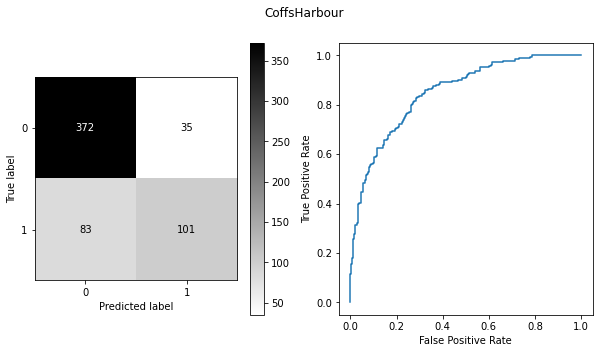

Dartmoor records: 2943
Czulosc: 0.6862745098039216
Swoistosc: 0.8463302752293578
Accuracy: 0.8047538200339559
ROC auc: 0.7476786013050025
F1 score: 0.6461538461538461


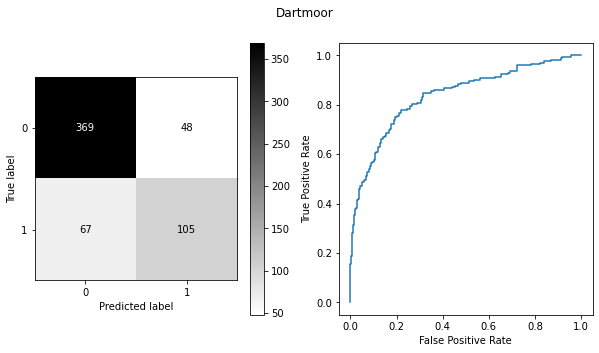

Darwin records: 3082
Czulosc: 0.738562091503268
Swoistosc: 0.8728448275862069
Accuracy: 0.839546191247974
ROC auc: 0.7835445518683041
F1 score: 0.6953846153846155


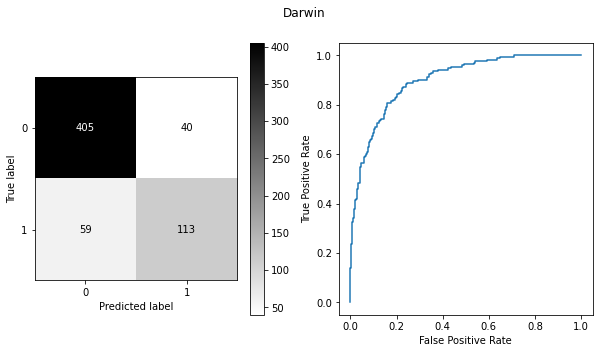

GoldCoast records: 2980
Czulosc: 0.6470588235294118
Swoistosc: 0.8574423480083857
Accuracy: 0.8154362416107382
ROC auc: 0.7189540484746539
F1 score: 0.5833333333333334


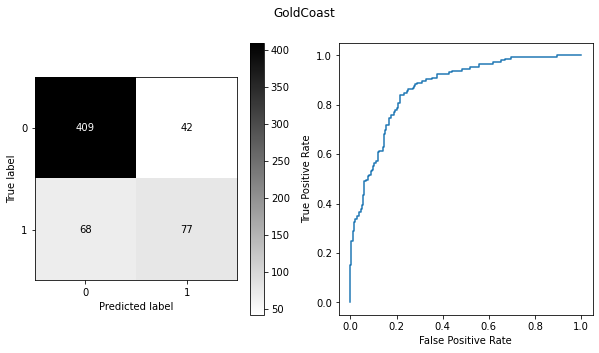

Hobart records: 3188
Czulosc: 0.6095238095238096
Swoistosc: 0.801125703564728
Accuracy: 0.7695924764890282
ROC auc: 0.6444318753142282
F1 score: 0.46545454545454545


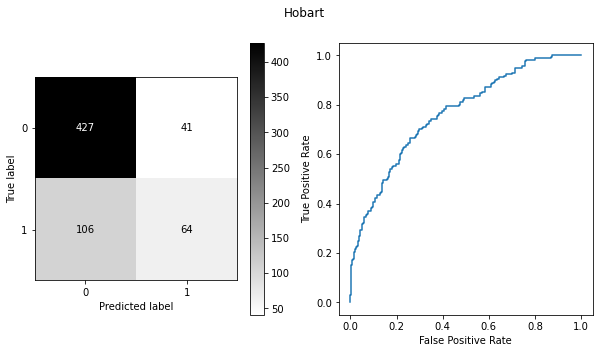

Launceston records: 3028
Czulosc: 0.6822429906542056
Swoistosc: 0.8476953907815631
Accuracy: 0.8184818481848185
ROC auc: 0.7077673182265432
F1 score: 0.5703125


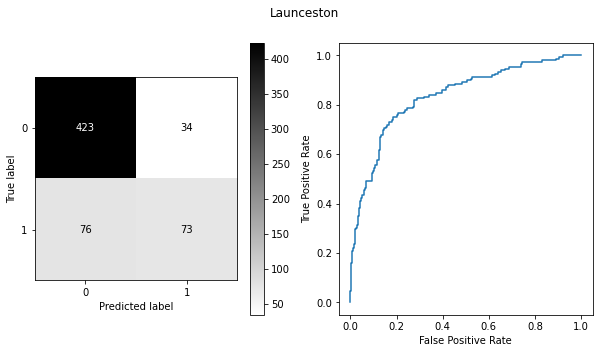

Melbourne records: 2435
Czulosc: 0.7093023255813954
Swoistosc: 0.8154613466334164
Accuracy: 0.7967145790554415
ROC auc: 0.6904145622895622
F1 score: 0.5520361990950227


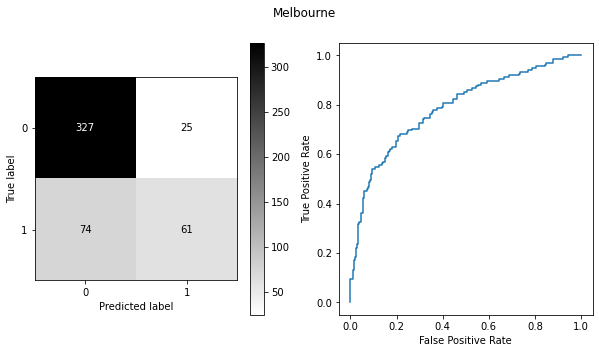

MelbourneAirport records: 3009
Czulosc: 0.6588235294117647
Swoistosc: 0.8568665377176016
Accuracy: 0.8289036544850499
ROC auc: 0.6846642764015646
F1 score: 0.5209302325581395


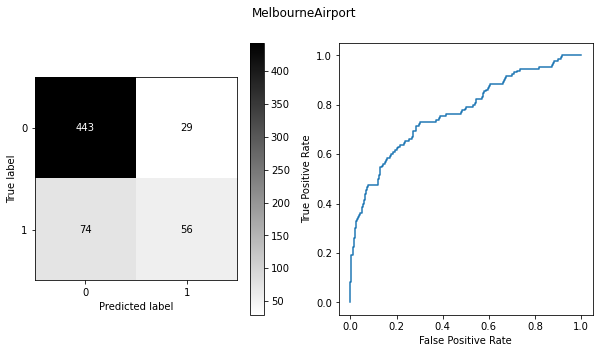

Mildura records: 3007
Czulosc: 0.6451612903225806
Swoistosc: 0.9246935201401051
Accuracy: 0.9102990033222591
ROC auc: 0.6485260770975056
F1 score: 0.425531914893617


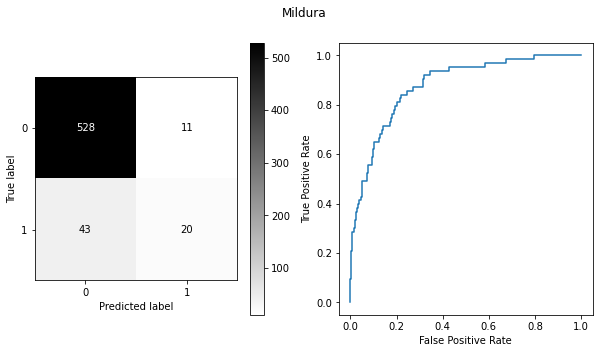

Moree records: 2854
Czulosc: 0.5818181818181818
Swoistosc: 0.9186046511627907
Accuracy: 0.8861646234676007
ROC auc: 0.6930773832182283
F1 score: 0.49612403100775193


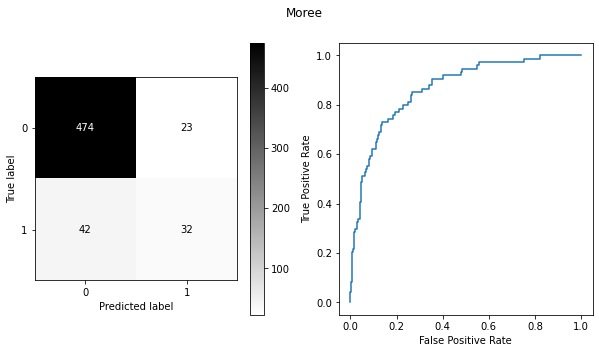

MountGambier records: 3030
Czulosc: 0.708029197080292
Swoistosc: 0.7889125799573561
Accuracy: 0.7706270627062707
ROC auc: 0.6986684917869588
F1 score: 0.5825825825825827


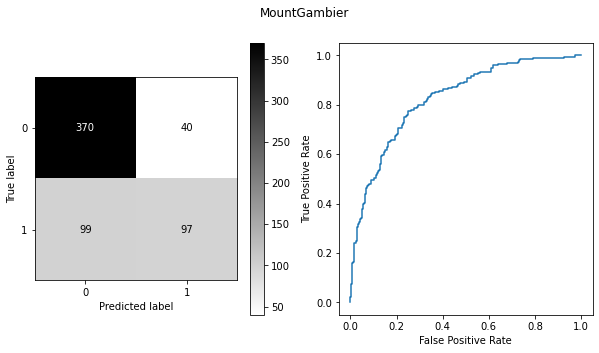

MountGinini records: 2907
Czulosc: 0.6371681415929203
Swoistosc: 0.7995735607675906
Accuracy: 0.7680412371134021
ROC auc: 0.667588623725672
F1 score: 0.5161290322580645


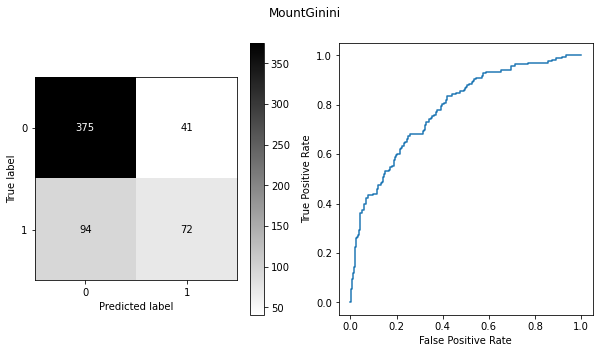

Newcastle records: 2955
Czulosc: 0.5641025641025641
Swoistosc: 0.8070175438596491
Accuracy: 0.7749576988155669
ROC auc: 0.6158997252747253
F1 score: 0.39819004524886875


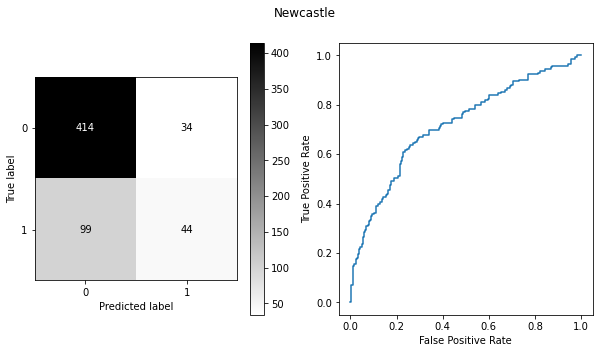

Nhil records: 1569
Czulosc: 0.5416666666666666
Swoistosc: 0.9323308270676691
Accuracy: 0.8726114649681529
ROC auc: 0.7547138047138047
F1 score: 0.5652173913043478


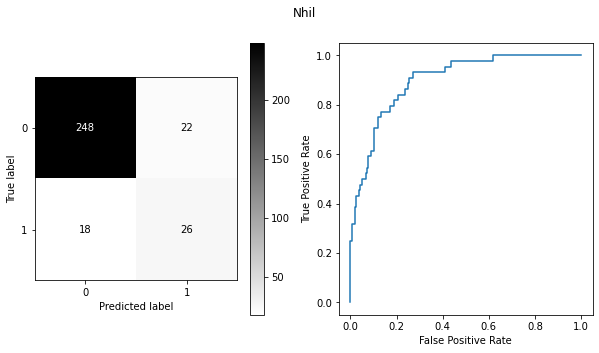

NorahHead records: 2929
Czulosc: 0.7142857142857143
Swoistosc: 0.8456521739130435
Accuracy: 0.8174061433447098
ROC auc: 0.7371501644135915
F1 score: 0.627177700348432


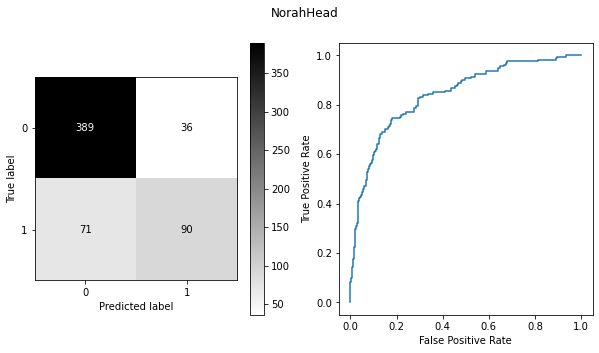

NorfolkIsland records: 2964
Czulosc: 0.7122302158273381
Swoistosc: 0.8105726872246696
Accuracy: 0.7875210792580101
ROC auc: 0.7185479597244303
F1 score: 0.6111111111111112


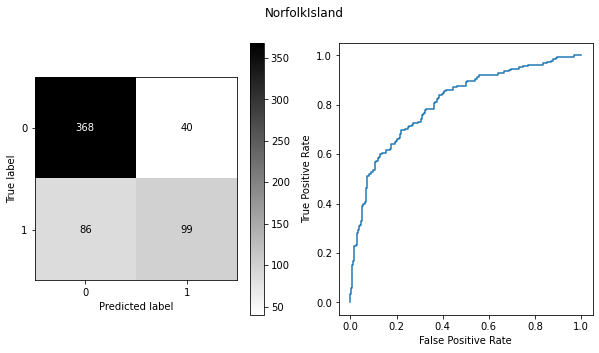

Nuriootpa records: 3002
Czulosc: 0.7
Swoistosc: 0.8904109589041096
Accuracy: 0.8618968386023295
ROC auc: 0.7366975835977543
F1 score: 0.6028708133971291


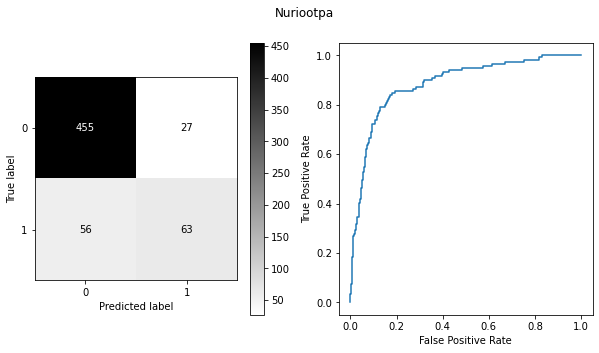

PearceRAAF records: 2762
Czulosc: 0.7464788732394366
Swoistosc: 0.8983402489626556
Accuracy: 0.8788426763110307
ROC auc: 0.7398482674666319
F1 score: 0.6127167630057804


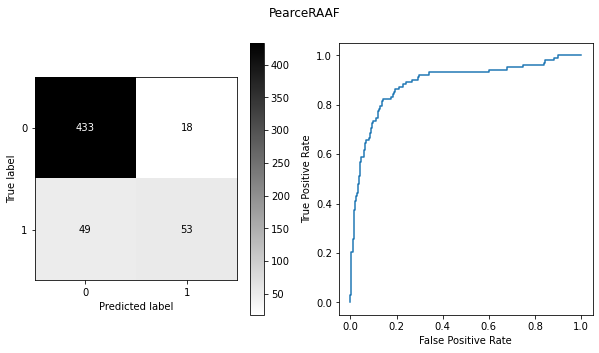

Penrith records: 2964
Czulosc: 0.6796116504854369
Swoistosc: 0.8653061224489796
Accuracy: 0.8330522765598651
ROC auc: 0.7212479083537134
F1 score: 0.5857740585774057


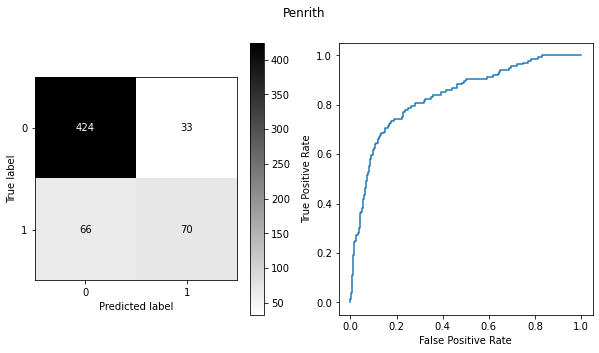

Perth records: 3193
Czulosc: 0.7291666666666666
Swoistosc: 0.8968692449355433
Accuracy: 0.8716744913928013
ROC auc: 0.7524366471734893
F1 score: 0.6306306306306306


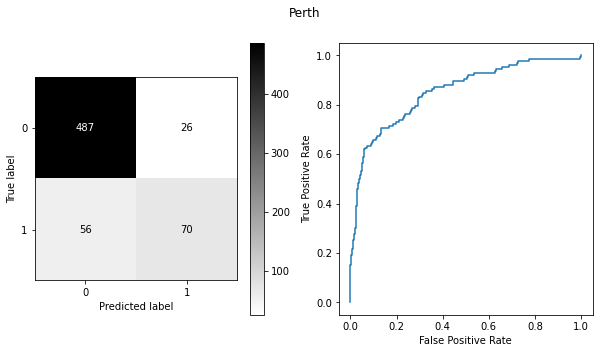

PerthAirport records: 3009
Czulosc: 0.7777777777777778
Swoistosc: 0.904296875
Accuracy: 0.8853820598006644
ROC auc: 0.7734137133114115
F1 score: 0.6698564593301436


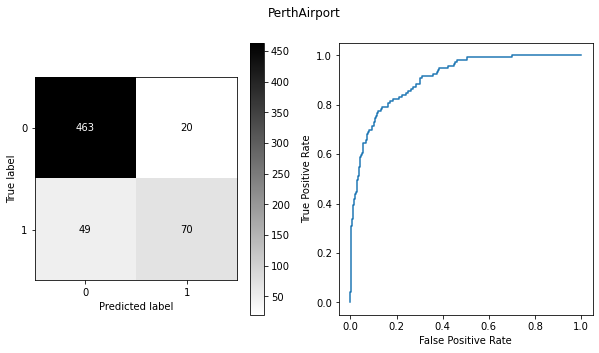

Portland records: 2996
Czulosc: 0.69
Swoistosc: 0.7675
Accuracy: 0.7416666666666667
ROC auc: 0.7146904585928976
F1 score: 0.6403712296983758


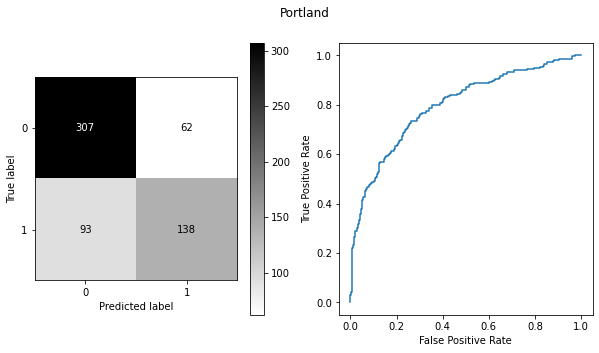

Richmond records: 2951
Czulosc: 0.7105263157894737
Swoistosc: 0.8737864077669902
Accuracy: 0.8527918781725888
ROC auc: 0.7035856715567582
F1 score: 0.5538461538461539


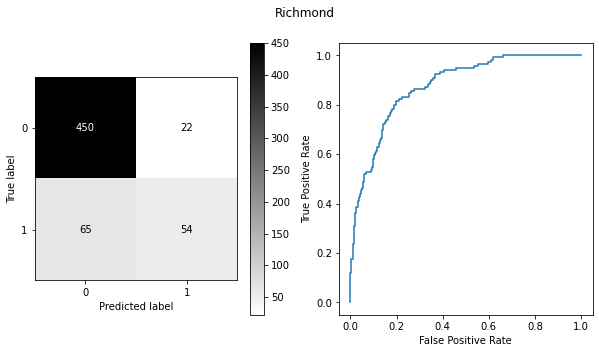

Sale records: 3000
Czulosc: 0.6181818181818182
Swoistosc: 0.8330275229357799
Accuracy: 0.8133333333333334
ROC auc: 0.6138947368421053
F1 score: 0.37777777777777777


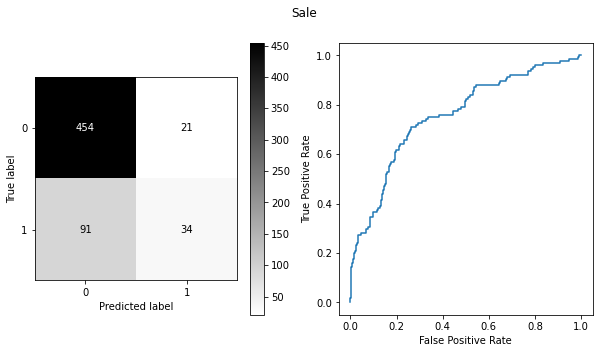

SalmonGums records: 2955
Czulosc: 0.6046511627906976
Swoistosc: 0.8996350364963503
Accuracy: 0.8781725888324873
ROC auc: 0.6438271604938272
F1 score: 0.41935483870967744


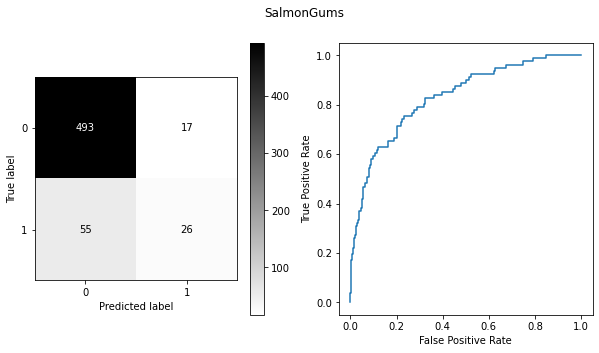

Sydney records: 3337
Czulosc: 0.6825396825396826
Swoistosc: 0.8542435424354243
Accuracy: 0.8218562874251497
ROC auc: 0.7208446291945299
F1 score: 0.5910652920962199


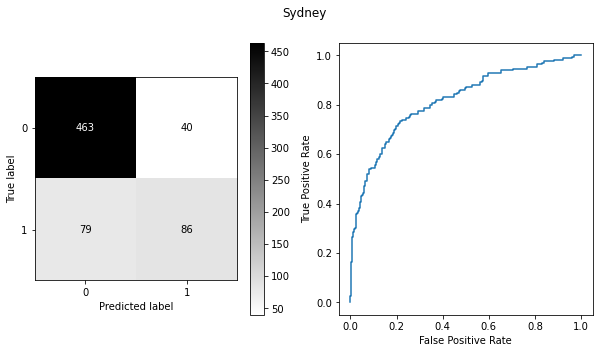

SydneyAirport records: 3005
Czulosc: 0.719626168224299
Swoistosc: 0.8461538461538461
Accuracy: 0.8236272878535774
ROC auc: 0.7181518440709618
F1 score: 0.5923076923076923


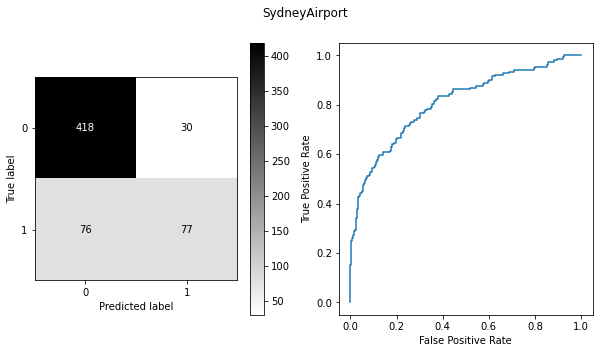

Townsville records: 3033
Czulosc: 0.6219512195121951
Swoistosc: 0.9180952380952381
Accuracy: 0.8780889621087314
ROC auc: 0.7410621707934137
F1 score: 0.5795454545454546


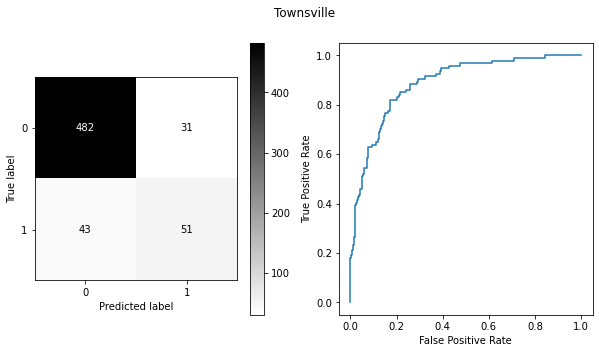

Tuggeranong records: 2998
Czulosc: 0.5862068965517241
Swoistosc: 0.8752436647173489
Accuracy: 0.8333333333333334
ROC auc: 0.684625728372927
F1 score: 0.504950495049505


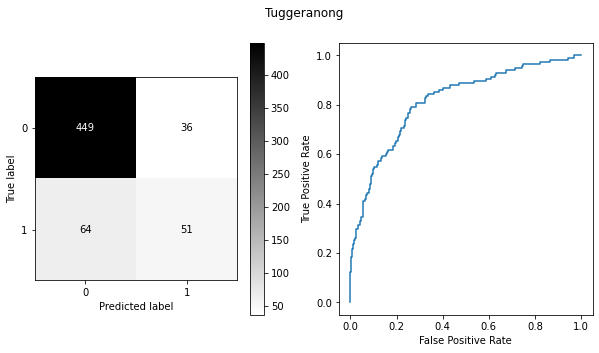

WaggaWagga records: 2976
Czulosc: 0.782608695652174
Swoistosc: 0.9316888045540797
Accuracy: 0.9144295302013423
ROC auc: 0.7851778656126481
F1 score: 0.6792452830188679


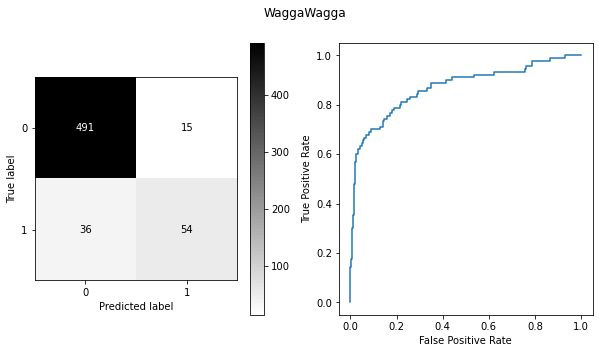

Walpole records: 2819
Czulosc: 0.676829268292683
Swoistosc: 0.8625
Accuracy: 0.8085106382978723
ROC auc: 0.767754434824726
F1 score: 0.6727272727272727


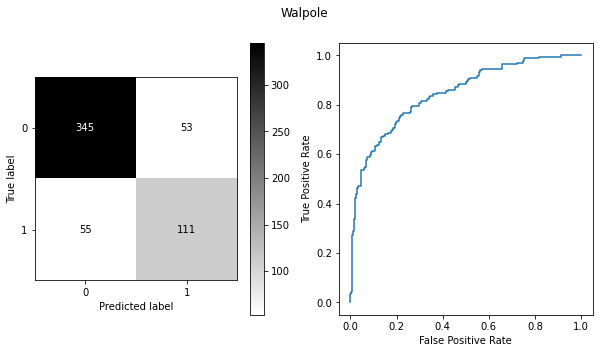

Watsonia records: 2999
Czulosc: 0.6326530612244898
Swoistosc: 0.8446215139442231
Accuracy: 0.81
ROC auc: 0.6822981366459627
F1 score: 0.5210084033613446


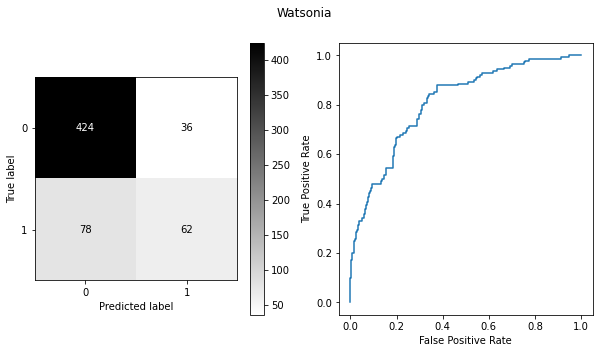

Williamtown records: 2553
Czulosc: 0.6842105263157895
Swoistosc: 0.8173076923076923
Accuracy: 0.7925636007827789
ROC auc: 0.6899559133601687
F1 score: 0.5508474576271186


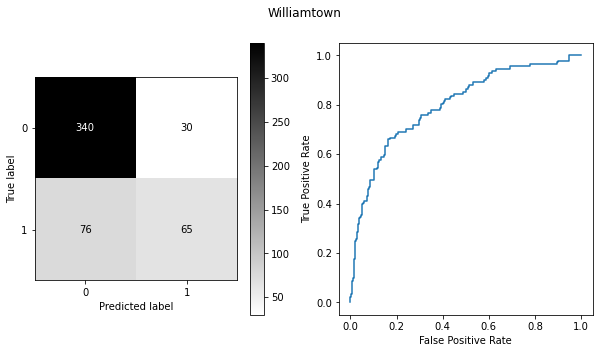

Witchcliffe records: 2952
Czulosc: 0.7919463087248322
Swoistosc: 0.8710407239819005
Accuracy: 0.8510998307952623
ROC auc: 0.7998832417582419
F1 score: 0.728395061728395


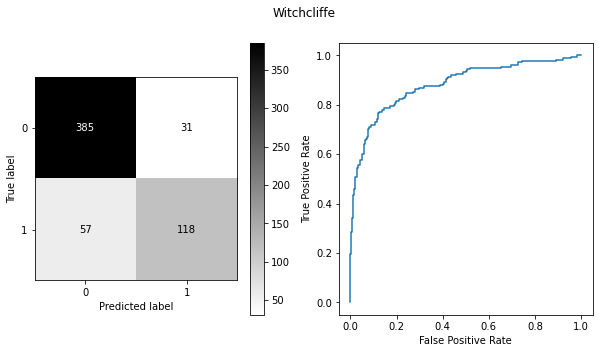

Wollongong records: 2983
Czulosc: 0.7040816326530612
Swoistosc: 0.8577154308617234
Accuracy: 0.8324958123953099
ROC auc: 0.7146999062206939
F1 score: 0.5798319327731093


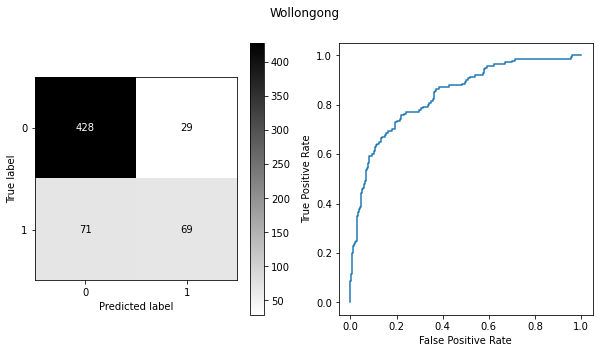

Woomera records: 2990
Czulosc: 0.782608695652174
Swoistosc: 0.9617391304347827
Accuracy: 0.9548494983277592
ROC auc: 0.7205197132616488
F1 score: 0.5714285714285714


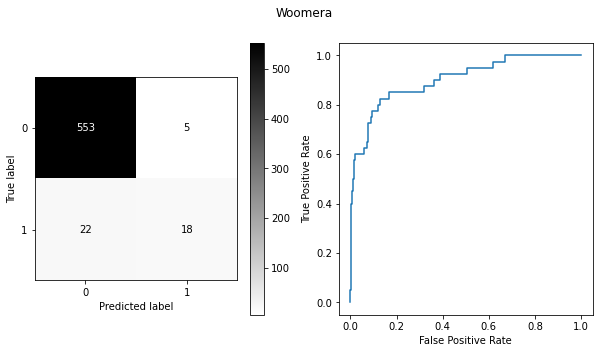

In [893]:
from sklearn.metrics import roc_auc_score, f1_score

models = dict()

for frame in dataframes:
    location = frame['Location'].unique()[0]
    print(location, "records:", len(frame))
    #print(location)
    new_frame = frame.drop(columns=['Location', 'Date'])
    y = frame['RainTomorrow']
    y = y.astype('int')
    X = new_frame.drop(columns=['RainTomorrow'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_split, test_size=test_split, random_state=seed)

    model = LogisticRegression(max_iter=10000)

    model.fit(X_train, y_train)
    models[location] = model
    predict = model.predict(X_test)

    figure, axis = plt.subplots(1, 2, figsize=(10,5))
    figure.suptitle(location)

    cm_model = confusion_matrix(y_test, model.predict(X_test))

    tn_model = cm_model[0][0]
    fn_model = cm_model[0][1]
    tp_model = cm_model[1][1]
    fp_model = cm_model[1][0]

    print("Czulosc:", tp_model/(tp_model + fn_model))
    print("Swoistosc:", tn_model/(tn_model + fp_model))
    print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

    ConfusionMatrixDisplay(cm_model).plot(cmap='binary', ax=axis[0])

    fpr, tpr, roc_auc = roc_curve(y_test, model.decision_function(X_test))

    print("ROC auc:", roc_auc_score(y_test, model.predict(X_test)))
    print("F1 score:", f1_score(y_test, model.predict(X_test)))

    rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
    rok_model.plot(ax=axis[1])
    plt.show()




Adelaide
Czulosc: 0.4761584956346541
Swoistosc: 0.8947898447023904
Accuracy: 0.7602604222869681
ROC auc: 0.7323957635989382
F1 score: 0.5607328807750609


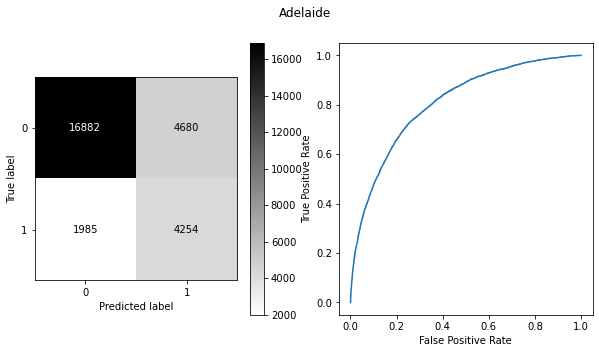

Albany
Czulosc: 0.3193038239477868
Swoistosc: 0.8471293375394322
Accuracy: 0.6202294881479083
ROC auc: 0.6171761846346276
F1 score: 0.4195711929631666


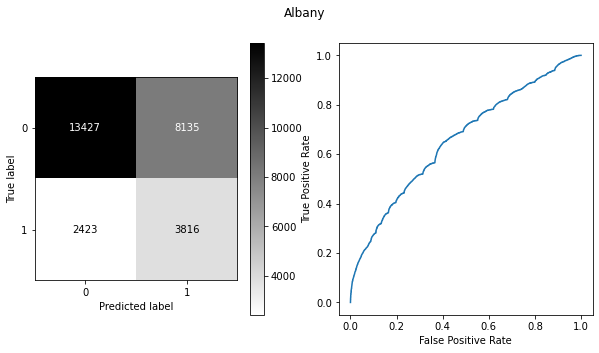

Albury
Czulosc: 0.4414827155351937
Swoistosc: 0.8901467274825521
Accuracy: 0.7351534117477788
ROC auc: 0.7154125515614836
F1 score: 0.5352521618380357


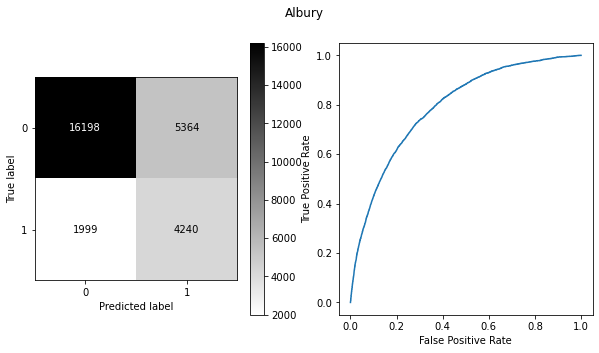

AliceSprings
Czulosc: 0.5450180072028812
Swoistosc: 0.8458536157523133
Accuracy: 0.7917700802129419
ROC auc: 0.6655725578734555
F1 score: 0.484826911097268


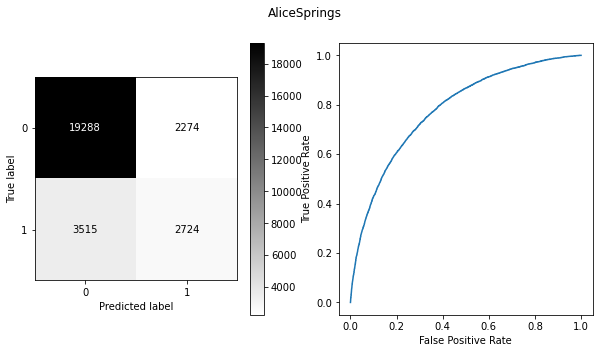

BadgerysCreek
Czulosc: 0.5712881022615536
Swoistosc: 0.8731277939075534
Accuracy: 0.8068774504514226
ROC auc: 0.7187094179550648
F1 score: 0.5649461145774249


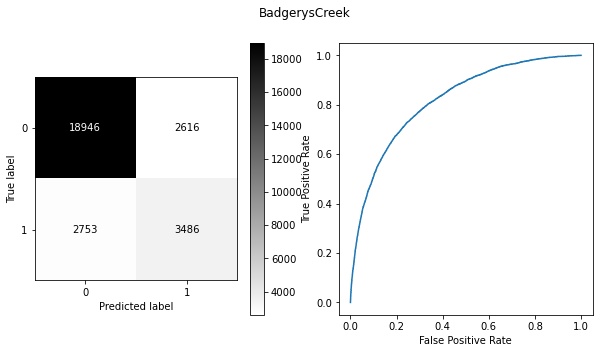

Ballarat
Czulosc: 0.524697415767092
Swoistosc: 0.86023885276894
Accuracy: 0.7864465307003345
ROC auc: 0.6897054129245767
F1 score: 0.5193880029142719


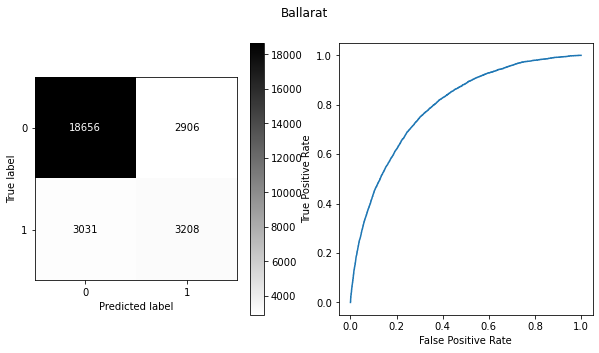

Bendigo
Czulosc: 0.49921752738654146
Swoistosc: 0.88024636169473
Accuracy: 0.7751519729506133
ROC auc: 0.7177343895964623
F1 score: 0.5505141295750342


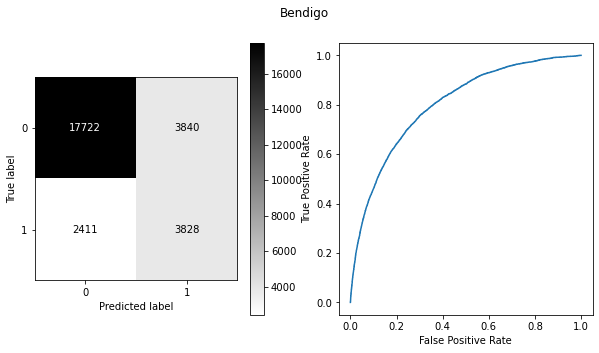

Brisbane
Czulosc: 0.5601566029212468
Swoistosc: 0.8809546313799622
Accuracy: 0.8043235854825366
ROC auc: 0.7303897954732953
F1 score: 0.577639751552795


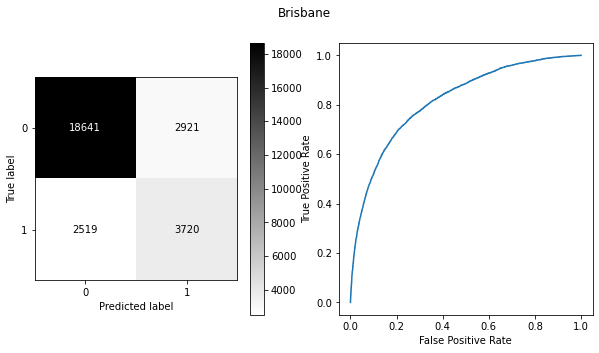

Cairns
Czulosc: 0.6119676945668135
Swoistosc: 0.8176815408541691
Accuracy: 0.7975252688752204
ROC auc: 0.6090844141323644
F1 score: 0.3719736695302912


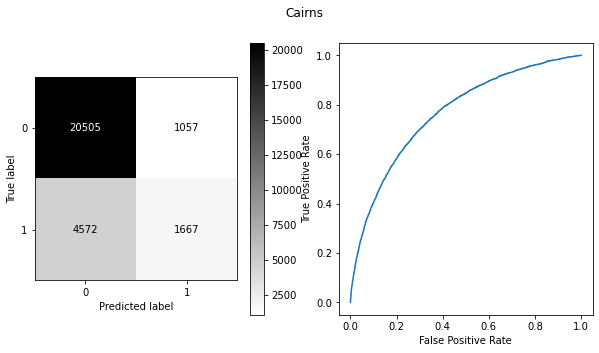

Canberra
Czulosc: 0.4682450206689215
Swoistosc: 0.8738015945100414
Accuracy: 0.7573468580266897
ROC auc: 0.7011301731321682
F1 score: 0.5256644635072423


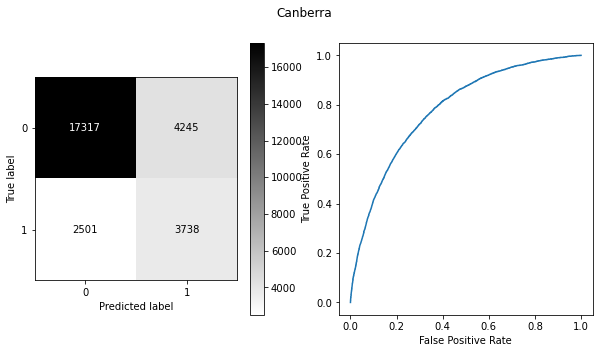

Cobar
Czulosc: 0.491752972765631
Swoistosc: 0.8802302302302303
Accuracy: 0.7709434912413222
ROC auc: 0.7160464210907868
F1 score: 0.5470839260312945


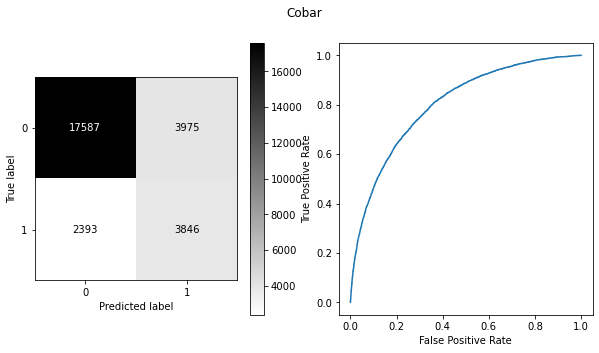

CoffsHarbour
Czulosc: 0.5030521642619312
Swoistosc: 0.8731122225999126
Accuracy: 0.7771662889824107
ROC auc: 0.7075286452770178
F1 score: 0.5393024466423738


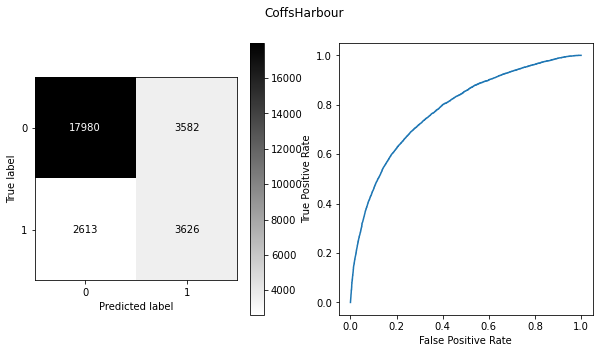

Dartmoor
Czulosc: 0.5701384708007224
Swoistosc: 0.8510824787448505
Accuracy: 0.8007265925686127
ROC auc: 0.678010001061659
F1 score: 0.5063268579575834


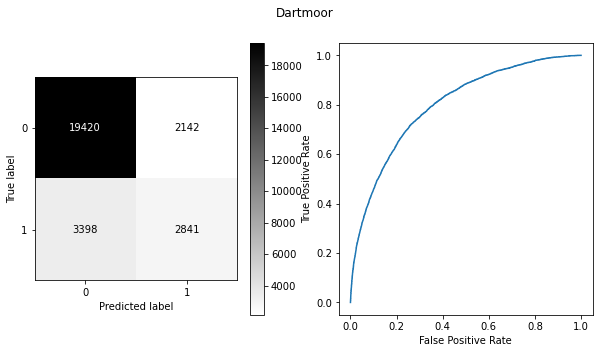

Darwin
Czulosc: 0.5945945945945946
Swoistosc: 0.7888520436677968
Accuracy: 0.7821301392036257
ROC auc: 0.536796991626513
F1 score: 0.15886682405221497


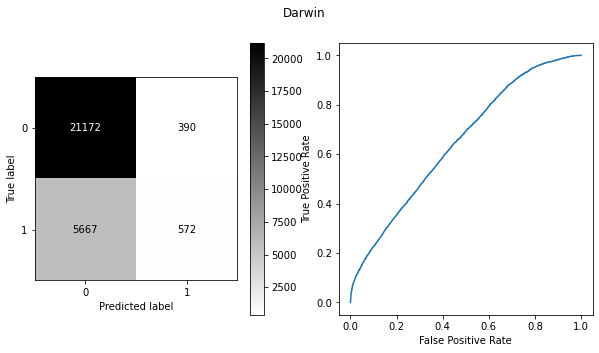

GoldCoast
Czulosc: 0.6795275590551181
Swoistosc: 0.8478596140219249
Accuracy: 0.8247904751627639
ROC auc: 0.6791714738782479
F1 score: 0.5152751517563936


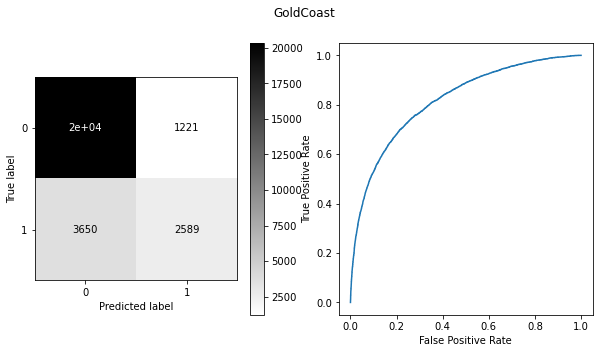

Hobart
Czulosc: 0.5469307637401856
Swoistosc: 0.8570077037437491
Accuracy: 0.7945037948275242
ROC auc: 0.6867555852943606
F1 score: 0.5176053364856877


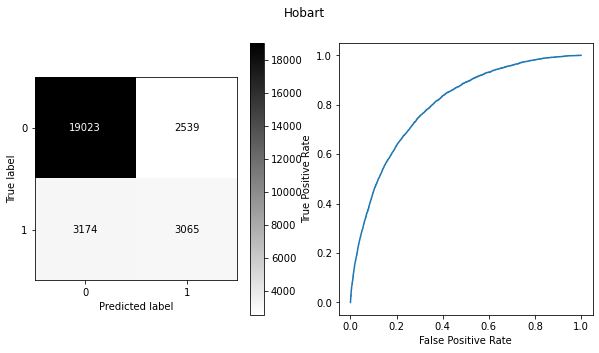

Launceston
Czulosc: 0.596487470550439
Swoistosc: 0.8506830364862528
Accuracy: 0.8079925182547391
ROC auc: 0.6795048497859711
F1 score: 0.5106343967730106


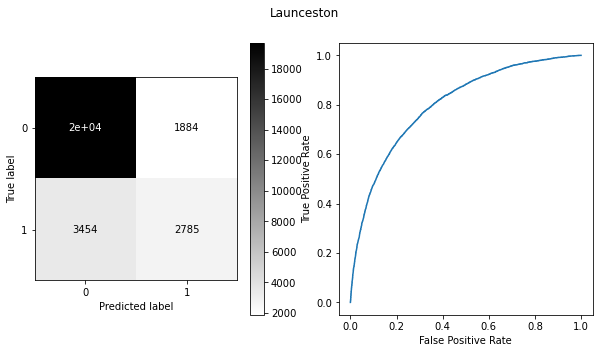

Melbourne
Czulosc: 0.6105263157894737
Swoistosc: 0.8570744032061335
Accuracy: 0.8141074062084098
ROC auc: 0.6932996843018056
F1 score: 0.5337423312883436


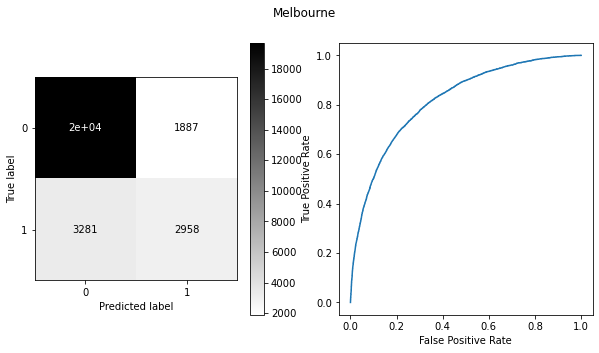

MelbourneAirport
Czulosc: 0.556112744250389
Swoistosc: 0.8627032428013444
Accuracy: 0.7989280961116506
ROC auc: 0.6982075931610137
F1 score: 0.5350191315920813


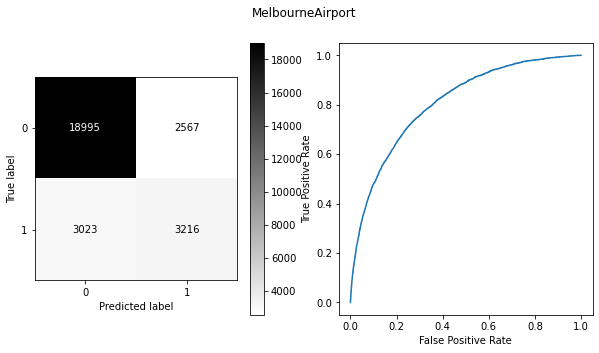

Mildura
Czulosc: 0.47597653812554597
Swoistosc: 0.8774509803921569
Accuracy: 0.761735189381677
ROC auc: 0.7082875842003213
F1 score: 0.5352231265787257


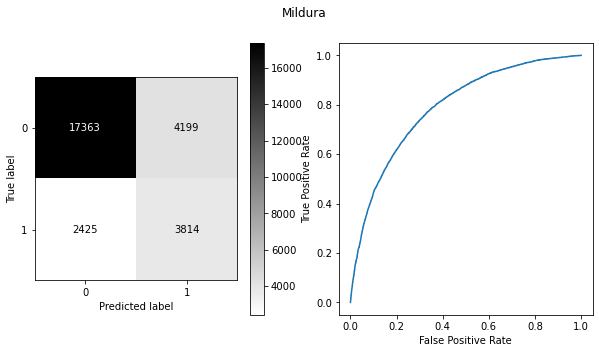

Moree
Czulosc: 0.5055735854381261
Swoistosc: 0.8717775417591966
Accuracy: 0.7784252365022841
ROC auc: 0.7058913177964018
F1 score: 0.5377457601680925


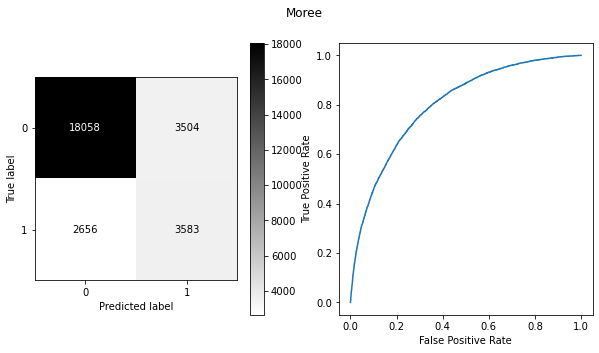

MountGambier
Czulosc: 0.612472647702407
Swoistosc: 0.8519220007748267
Accuracy: 0.8125606992554225
ROC auc: 0.6832471750782257
F1 score: 0.517901748542881


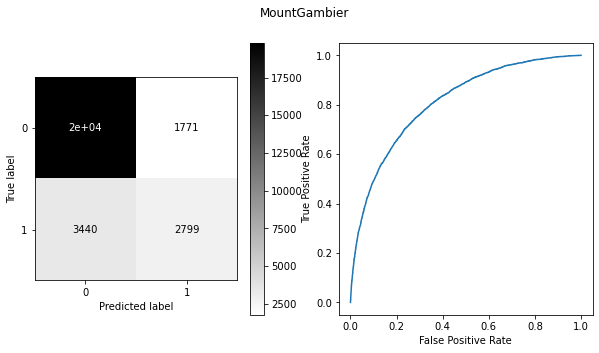

MountGinini
Czulosc: 0.43448275862068964
Swoistosc: 0.8622529343021188
Accuracy: 0.7373116074961332
ROC auc: 0.6762539896021654
F1 score: 0.491399122501567


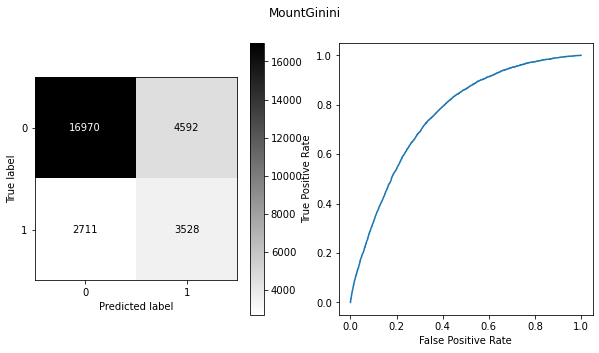

Newcastle
Czulosc: 0.4870982344952467
Swoistosc: 0.8577972985737224
Accuracy: 0.7694327542174741
ROC auc: 0.6798760847381903
F1 score: 0.5017876573915747


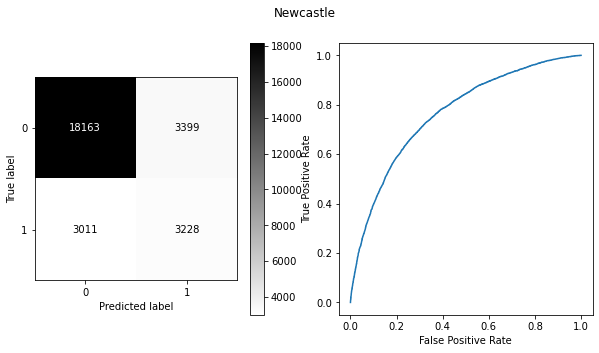

Nhil
Czulosc: 0.526774595267746
Swoistosc: 0.8522091974752029
Accuracy: 0.7864105607711953
ROC auc: 0.6756150541119702
F1 score: 0.49932546374367626


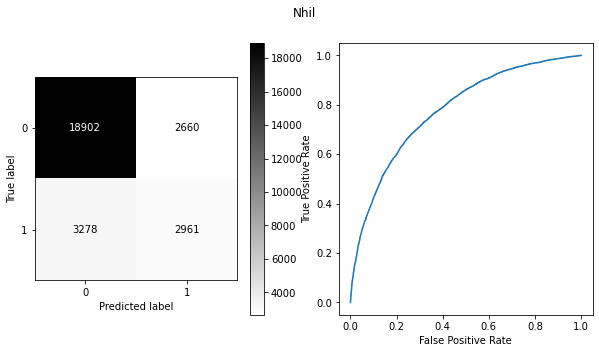

NorahHead
Czulosc: 0.6012869399428027
Swoistosc: 0.8425757254818894
Accuracy: 0.8061580518686379
ROC auc: 0.6634007622267802
F1 score: 0.48356492573071397


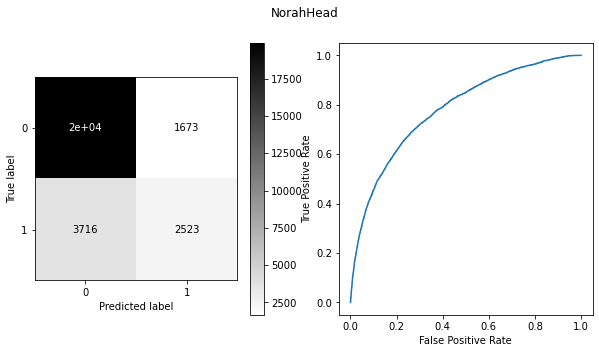

NorfolkIsland
Czulosc: 0.5664867026594681
Swoistosc: 0.8506140350877193
Accuracy: 0.7995036149778785
ROC auc: 0.6767659601443945
F1 score: 0.5040925266903914


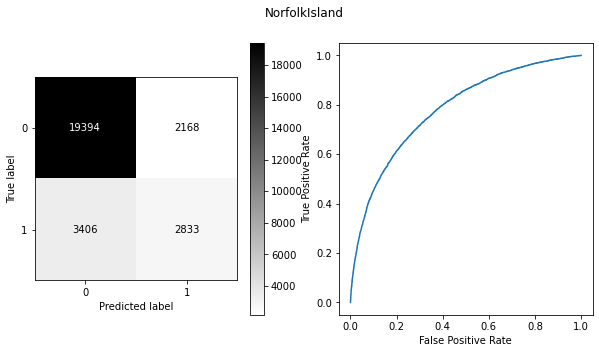

Nuriootpa
Czulosc: 0.540759493670886
Swoistosc: 0.8612634850978241
Accuracy: 0.7929570878745369
ROC auc: 0.6936748032812678
F1 score: 0.5268003946070372


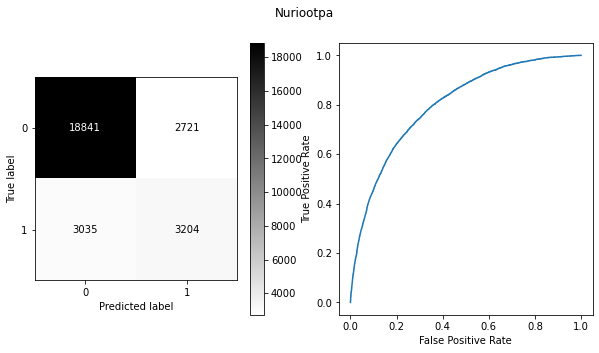

PearceRAAF
Czulosc: 0.5126225126225126
Swoistosc: 0.8677077894337115
Accuracy: 0.7816985000539549
ROC auc: 0.7005407859359233
F1 score: 0.5321822246203655


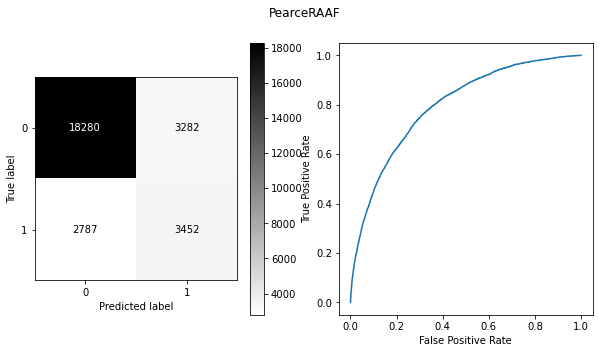

Penrith
Czulosc: 0.5500152951973081
Swoistosc: 0.8756995720265249
Accuracy: 0.7991079457573469
ROC auc: 0.7199653376771799
F1 score: 0.562886436565704


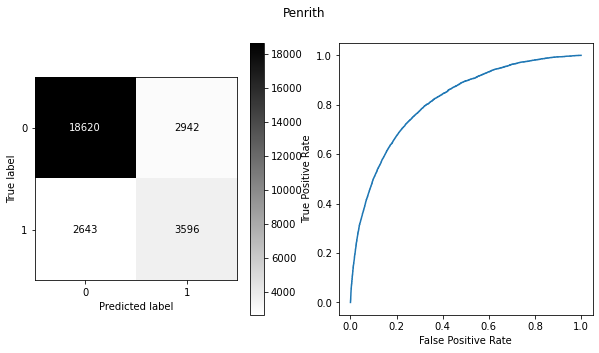

Perth
Czulosc: 0.4929677343103652
Swoistosc: 0.893071354705274
Accuracy: 0.7713031905327147
ROC auc: 0.7347877445641868
F1 score: 0.5674829931972789


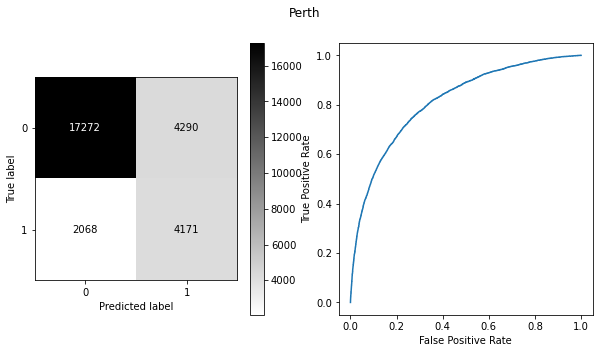

PerthAirport
Czulosc: 0.518758275709872
Swoistosc: 0.8708341268329842
Accuracy: 0.7847559440307903
ROC auc: 0.7067263018846758
F1 score: 0.5409634857318195


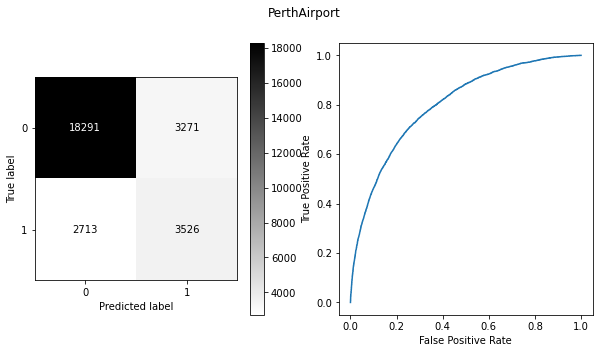

Portland
Czulosc: 0.6246913580246913
Swoistosc: 0.8359827786057294
Accuracy: 0.8082802776878529
ROC auc: 0.6507586921296109
F1 score: 0.46074463779846214


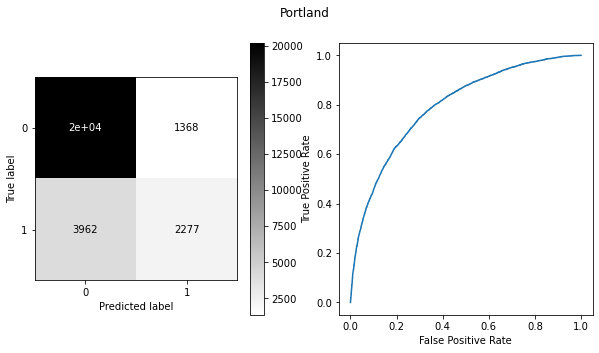

Richmond
Czulosc: 0.5689712206417467
Swoistosc: 0.8713399218570443
Accuracy: 0.80558253300241
ROC auc: 0.7152548191709163
F1 score: 0.5600325600325601


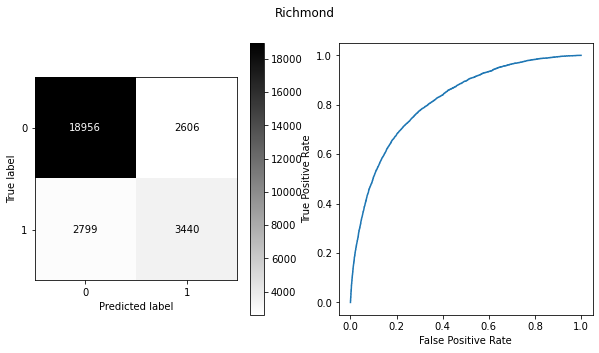

Sale
Czulosc: 0.6200665715644318
Swoistosc: 0.8461114642932824
Accuracy: 0.8119132405309162
ROC auc: 0.6719519220909778
F1 score: 0.4993776926759214


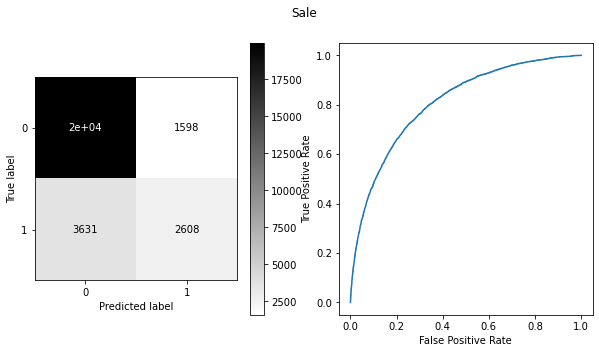

SalmonGums
Czulosc: 0.5304725329771247
Swoistosc: 0.859618558591601
Accuracy: 0.7887126362361067
ROC auc: 0.6894008011190875
F1 score: 0.5196270853778214


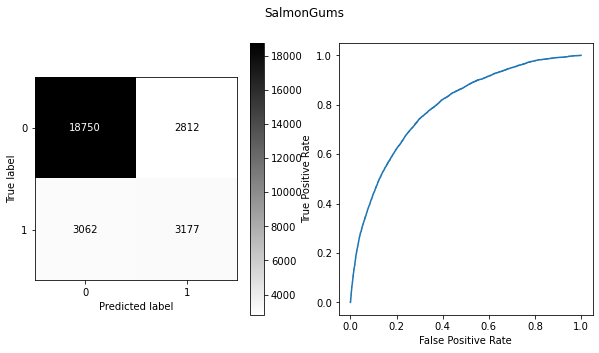

Sydney
Czulosc: 0.5320874981891931
Swoistosc: 0.8772131304431046
Accuracy: 0.7915182907089673
ROC auc: 0.7194577826606586
F1 score: 0.5589712372546036


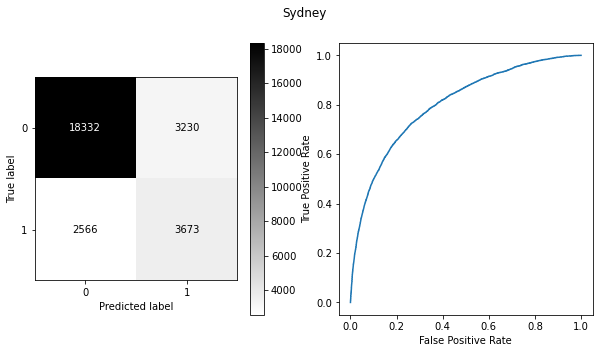

SydneyAirport
Czulosc: 0.5937379946215905
Swoistosc: 0.8606771409603895
Accuracy: 0.810690262940182
ROC auc: 0.6986713645977034
F1 score: 0.5401485364788118


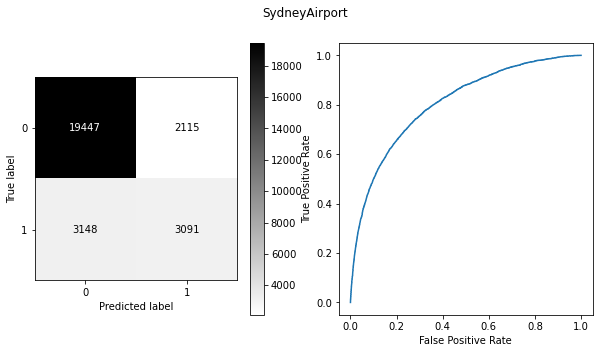

Townsville
Czulosc: 0.6615801966768396
Swoistosc: 0.8274585546434895
Accuracy: 0.8098629545699795
ROC auc: 0.6332126195011114
F1 score: 0.4246843709185895


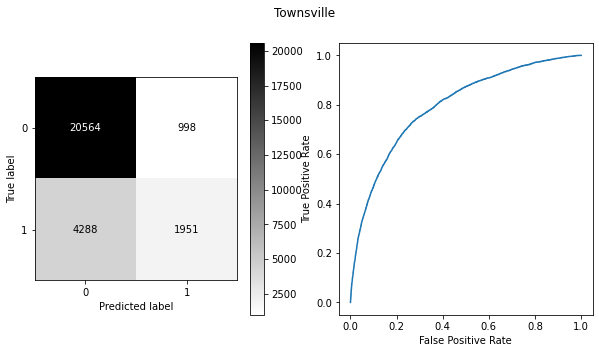

Tuggeranong
Czulosc: 0.4683698296836983
Swoistosc: 0.8779939737500638
Accuracy: 0.7568792489478796
ROC auc: 0.7072073525966317
F1 score: 0.5325402863268552


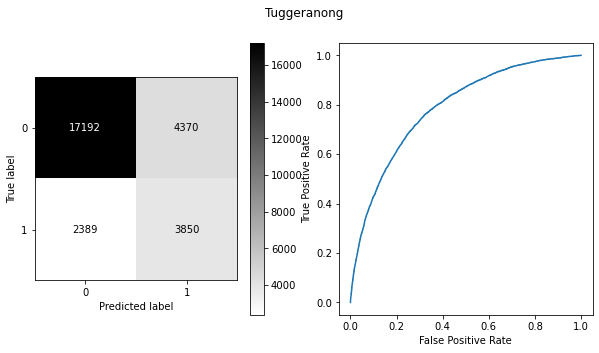

WaggaWagga
Czulosc: 0.4540645579186009
Swoistosc: 0.8903333692955011
Accuracy: 0.7449732024027913
ROC auc: 0.719806761579259
F1 score: 0.5426396593987872


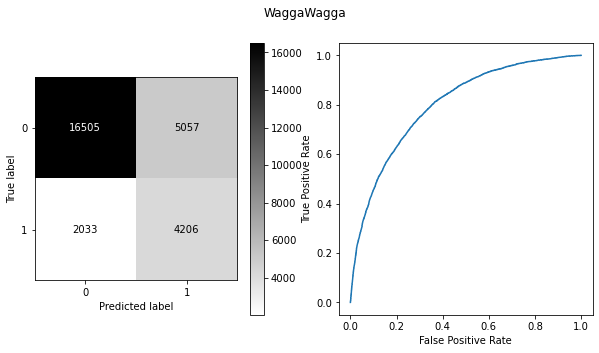

Walpole
Czulosc: 0.5999585234342596
Swoistosc: 0.8543887897645677
Accuracy: 0.8102586237905112
ROC auc: 0.6871165805383935
F1 score: 0.523099177289576


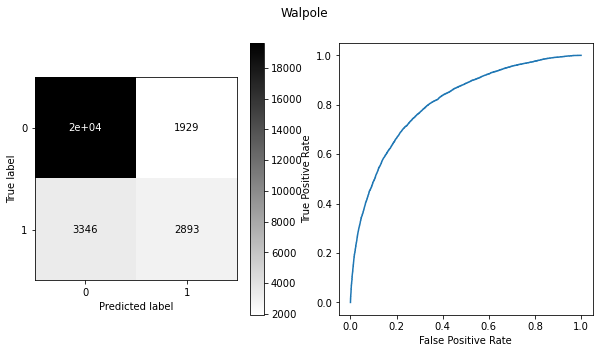

Watsonia
Czulosc: 0.5587223587223588
Swoistosc: 0.8696533923303835
Accuracy: 0.801374051293119
ROC auc: 0.7108901017427811
F1 score: 0.5526571613739468


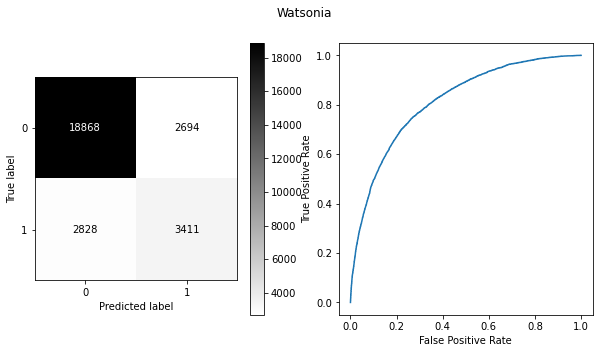

Williamtown
Czulosc: 0.5513961337833692
Swoistosc: 0.8757224075553258
Accuracy: 0.7996834646235746
ROC auc: 0.7202224565639012
F1 score: 0.563455357842753


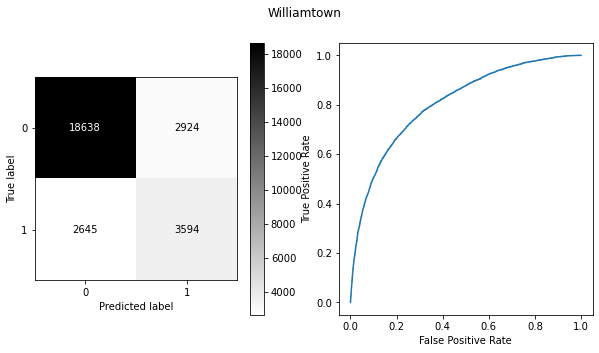

Witchcliffe
Czulosc: 0.5809289232934554
Swoistosc: 0.8672062214586065
Accuracy: 0.8086759469083846
ROC auc: 0.7093896778597467
F1 score: 0.5538874444351253


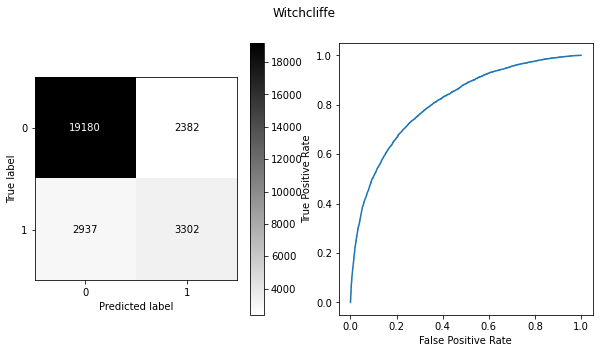

Wollongong
Czulosc: 0.6623641304347826
Swoistosc: 0.8274530313392606
Accuracy: 0.8099708643573972
ROC auc: 0.6332252342269133
F1 score: 0.42469781117281935


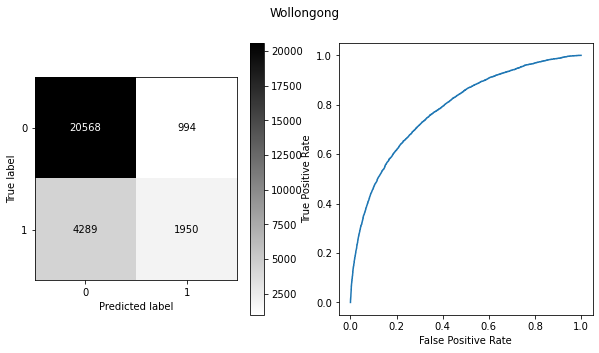

Woomera
Czulosc: 0.6219512195121951
Swoistosc: 0.8213469174922787
Accuracy: 0.8007625624977519
ROC auc: 0.6178917674069352
F1 score: 0.391920079042705


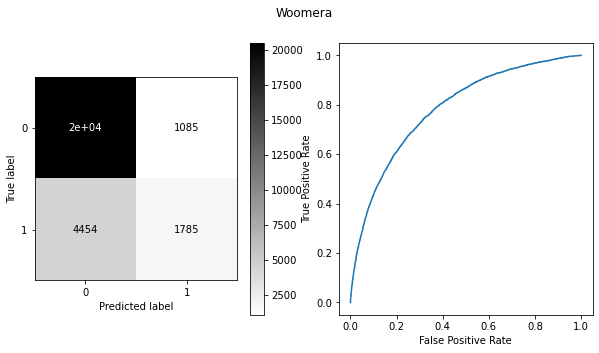

In [894]:
y_australia = new_australia['RainTomorrow']
X_australia = new_australia.drop(columns=['Location', 'Date', 'RainTomorrow'])
y_australia = y_australia.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X_australia, y_australia, train_size=train_split, test_size=test_split, random_state=seed)

for model in models.keys():
    print(model)
    location = model

    model = models[model]

    predict = model.predict(X_test)

    figure, axis = plt.subplots(1, 2, figsize=(10,5))
    figure.suptitle(location)

    cm_model = confusion_matrix(y_test, model.predict(X_test))

    tn_model = cm_model[0][0]
    fn_model = cm_model[0][1]
    tp_model = cm_model[1][1]
    fp_model = cm_model[1][0]

    print("Czulosc:", tp_model/(tp_model + fn_model))
    print("Swoistosc:", tn_model/(tn_model + fp_model))
    print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

    ConfusionMatrixDisplay(cm_model).plot(cmap='binary', ax=axis[0])

    fpr, tpr, roc_auc = roc_curve(y_test, model.decision_function(X_test))

    print("ROC auc:", roc_auc_score(y_test, model.predict(X_test)))
    print("F1 score:", f1_score(y_test, model.predict(X_test)))

    rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
    rok_model.plot(ax=axis[1])
    plt.show()

Czulosc: 0.2268057531215426
Swoistosc: 0.7762876036136723
Accuracy: 0.6512355670659329
ROC auc: 0.5015620925720465
F1 score: 0.2283940792614993


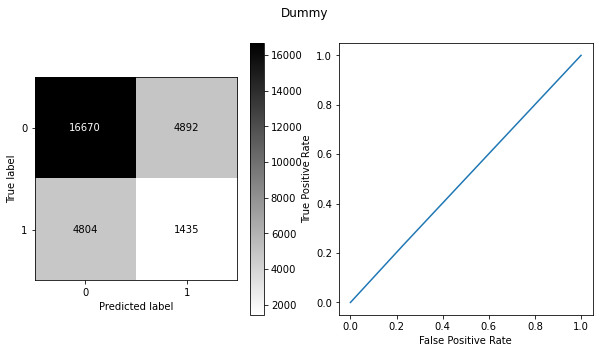

In [898]:
from sklearn.dummy import DummyClassifier

y_australia = new_australia['RainTomorrow']
X_australia = new_australia.drop(columns=['Location', 'Date', 'RainTomorrow'])
y_australia = y_australia.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X_australia, y_australia, train_size=train_split, test_size=test_split, random_state=seed)

model = DummyClassifier(strategy='stratified', random_state=seed)
# model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

predict = model.predict(X_test)

figure, axis = plt.subplots(1, 2, figsize=(10,5))
figure.suptitle('Dummy')

cm_model = confusion_matrix(y_test, model.predict(X_test))

tn_model = cm_model[0][0]
fn_model = cm_model[0][1]
tp_model = cm_model[1][1]
fp_model = cm_model[1][0]

print("Czulosc:", tp_model/(tp_model + fn_model))
print("Swoistosc:", tn_model/(tn_model + fp_model))
print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

ConfusionMatrixDisplay(cm_model).plot(cmap='binary', ax=axis[0])

fpr, tpr, roc_auc = roc_curve(y_test, model.predict(X_test))

print("ROC auc:", roc_auc_score(y_test, model.predict(X_test)))
print("F1 score:", f1_score(y_test, model.predict(X_test)))

rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
rok_model.plot(ax=axis[1])
plt.show()